<a href="https://colab.research.google.com/github/KishoreAnalyticsLab/BikeRental_Case_Study/blob/main/Yulu_Businesscase_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##About Yulu

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.

However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.

##Problem Statement
● **Strategic Expansion:** Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is
essential to tailor their services and strategies accordingly.

● **Revenue Recovery**: Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make
informed adjustments to regain profitability.

# Details on the dataset
Column Profiling:

● **datetime**: datetime

● **season**: season (1: spring, 2: summer, 3: fall, 4: winter)

● **holiday** : whether day is a holiday or not

● **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.

● **weather**:

  o 1: Clear, Few clouds, partly cloudy

  o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
  Scattered clouds

  o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
  
● **temp**: temperature in Celsius

● **atemp**: feeling temperature in Celsius

● **humidity**: humidity

● **windspeed**: wind speed

● **casual**: count of casual users

● **registered**: count of registered users

● **count**: count of total rental bikes including both casual and registered

#Exploratory Data Analysis

In [4]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.shape #Finding the shape of the given dataset

(10886, 12)

We can observe few important information.
1. Non-Null counts of the each columns, there is **no null** values in the dataset. We will also cross check it later.
2. Total **10886** rows and **12** columns of data are present in this dataset.
3. We can notice the **datetime, season, holiday, workingday, weather** seems to have the wrong datatype. We have to further analysis to find out a way to fix it.






In [7]:
  #Checking the null values of the dataset
  df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


*There* is **no** null values in any columns of the *dataset*

In [8]:
#Checking the datatypes of all the column in the given dataset
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [9]:
#Observing the unique values of all the columns mentioned above for change of datatype.

print(f'Unique values of Season - {set(df.season.unique())}') #it shouldn't be an integer, since it is category
print(f'Unique values of Holiday - {df.holiday.unique()}')
print(f'Unique values of Workingday - {df.workingday.unique()}')
print(f'Unique values of Weather - {set(df.weather.unique())}')


Unique values of Season - {1, 2, 3, 4}
Unique values of Holiday - [0 1]
Unique values of Workingday - [0 1]
Unique values of Weather - {1, 2, 3, 4}


Observation on the 'Datatypes' of each column: We can see few columns does not have appropriate datatype

*   '**season, holiday, workingday, weather**' - All these columns are categorical since they are categorised into few types. But it is taken as '**integer**' we will change the datatype to '**Object**'.
*   **datetime** is taken as **object** datatype. we will change it to **datetime** datatype for further analysis





In [10]:
df1 = df.copy() #creating a copy of the dataset for the future analysis

In [11]:
df["datetime"] = pd.to_datetime(df["datetime"]) #Changing the datatype of 'datatime' column from 'object' to 'datetime' format

In [12]:
#Changing the datatypes

df["datetime"] = pd.to_datetime(df["datetime"])
df["season"] = df["season"].astype('object')
df["holiday"] = df["holiday"].astype('object')
df["workingday"] = df["workingday"].astype('object')
df["weather"] = df["weather"].astype('object')

In [13]:
df.info()

#Checking whether the changes are reflected in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


Now, we can observe that the changes we made in the datatype are reflected in the dataframe

In [14]:
#To find the number of unique values in the each columns
def uniquevalues(dataframe):
  for i in dataframe.columns:
    print(f'No. of unique values in {i} ---> {dataframe[i].nunique()}')
uniquevalues(df)

No. of unique values in datetime ---> 10886
No. of unique values in season ---> 4
No. of unique values in holiday ---> 2
No. of unique values in workingday ---> 2
No. of unique values in weather ---> 4
No. of unique values in temp ---> 49
No. of unique values in atemp ---> 60
No. of unique values in humidity ---> 89
No. of unique values in windspeed ---> 28
No. of unique values in casual ---> 309
No. of unique values in registered ---> 731
No. of unique values in count ---> 822


The above code gives the insights of the number of unique values in the each column.

In [15]:
df.duplicated().value_counts()

,count
False,10886


We can say that dataset has **No** duplicate values

In [16]:
df.describe() #Statistical summary of the dataset

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


**Insights on the continuous variables:**
*   **temp** column
  1.   **Mean temp** is **20.23** Celsius
  1.   **Min temp** is **0.82** Celsius
  1.   **Max temp** is **41.0** Celsius
  2.   **Median temp** is **20.50** Celsius
  2.   **Median temp & Mean temp** are close to each other. This indicates that there is **less** variability in the temperature column and also outliers are **minimal**
*   **atemp** column - Actual temperature
  1.   **Mean atemp** is **23.65** Celsius
  1.   **Min atemp** is **0.76** Celsius
  1.   **Max atemp** is **45.45** Celsius
  2.   **Median atemp** is **24.24** Celsius
  2.   **Median atemp & Mean atemp** are close to each other. This indicates that there is **less** variability in the actual temperature column and also outliers are **minimal**
*   **humidity** column
  1.   **Mean humidity** is **61.88**
  1.   **Min humidity** is **0**
  1.   **Max humidity** is **100**
  2.   **Median humidity** is **62.00**
  2.   **Median humidity & Mean humidity** are close to each other. This indicates that there is **less** variability in the humidity column and also outliers are **minimal**
*   **windspeed** column
  1.   **Mean windspeed** is **12.79**
  1.   **Min windspeed** is **0**
  1.   **Max windspeed** is **56.99**
  2.   **Median windspeed** is **12.99**
  2.   **Median windspeed & Mean windspeed** are close to each other. This indicates that there is **less** variability in the windspeed column and also outliers are **minimal**
*   **count** column
  1.   **Mean number of booking** is **191.57**
  1.   **Min number of booking** is **1**
  1.   **Max number of booking** is **977**
  2.   **Median number of booking** is **145**. Mean and Median of count column deviates much and this could be because of more variability in the column


Columns that contains casual, registered and count of total users has high variability and **could have more outliers**.

In [17]:
#Extracting 'day', 'month', 'date' values from the 'datetime' column
df['date'] = df['datetime'].dt.date
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['houroftheday'] = df['datetime'].dt.hour
df['dayname'] = df['datetime'].dt.day_name()

In [18]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,month,houroftheday,dayname
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,1,4,Saturday


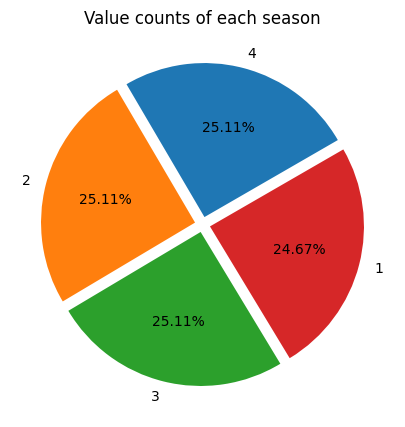

In [28]:
seasons = df['season'].value_counts()
season_df = df.groupby(['season'])['count'].sum()

plt.figure(figsize = (18,5))


plt.pie(seasons, labels = seasons.index, startangle = 30, autopct = "%.2f%%", explode = [0.05]*len(season_df.index))
plt.title("Value counts of each season")

plt.show()

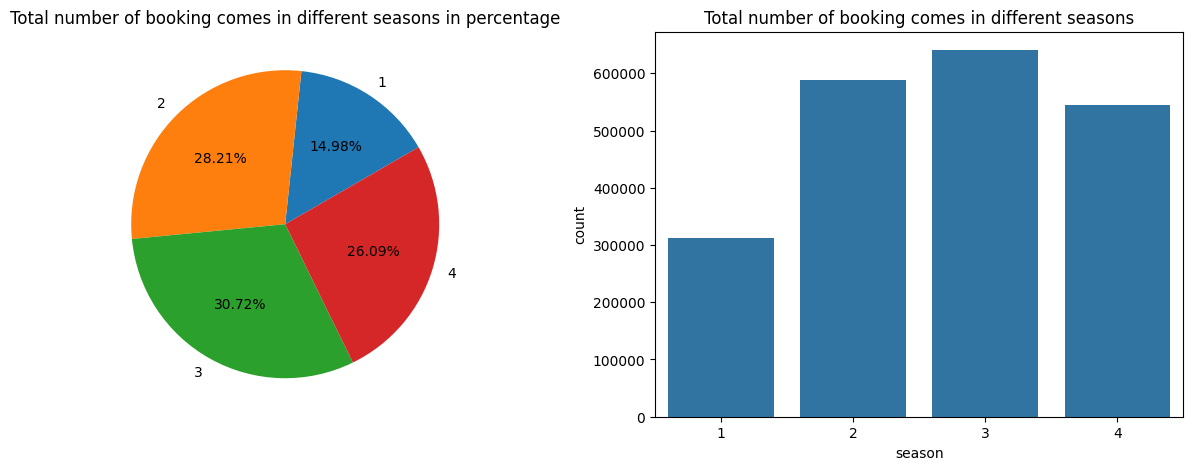

In [29]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(season_df, labels = season_df.index, startangle = 30, autopct = "%.2f%%")
plt.title("Total number of booking comes in different seasons in percentage")

plt.subplot(1,2,2)
sns.barplot(data = season_df)
plt.title("Total number of booking comes in different seasons")


plt.show()

Insights:

1.   From the above pie chart, we can conclude that the dataset contains **dates** of the order placed are **equally distributed** among different seasons.
2.   Second charts gives the insights of the **percentage of orders** comes from different seasons.
1.   Third charts gives the insights of **total number** of orders comes from the **different** season. Total numbers of orders taken from the count column. Here, **3(Fall)** season holds **maximum** no. of orders placed.



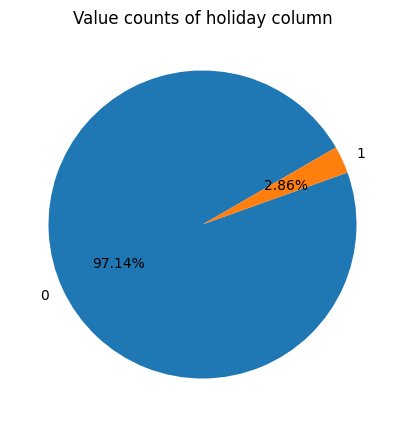

In [30]:
holiday = df['holiday'].value_counts()
holiday_df = df.groupby(['holiday'])['count'].sum()

plt.figure(figsize = (12,5))


plt.pie(holiday, labels = holiday.index, startangle = 30, autopct = "%.2f%%")
plt.title("Value counts of holiday column")

plt.show()

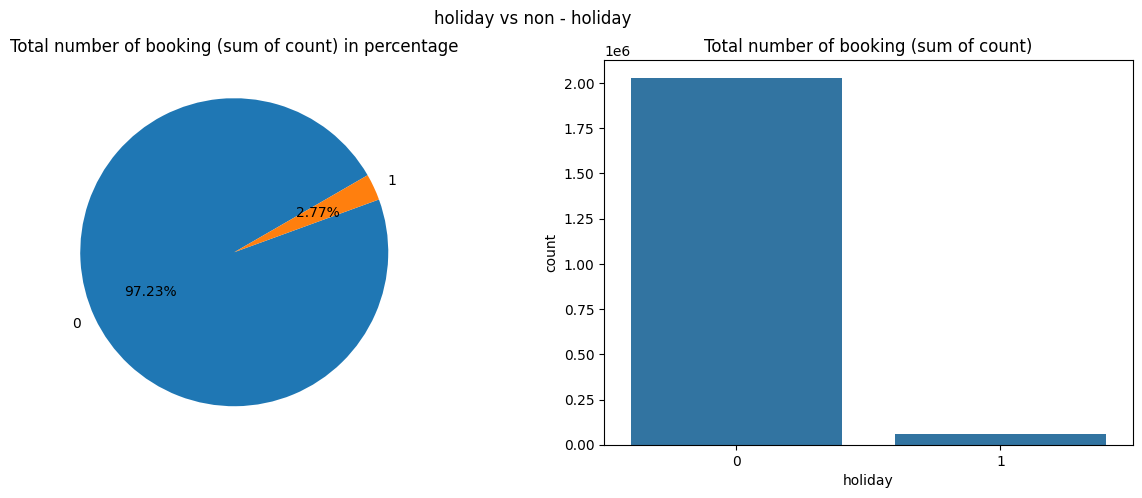

In [31]:
plt.figure(figsize = (15,5))


plt.subplot(1,2,1)
plt.pie(holiday_df, labels = holiday_df.index, startangle = 30, autopct = "%.2f%%")
plt.title("Total number of booking (sum of count) in percentage")

plt.subplot(1,2,2)
sns.barplot(data = holiday_df)
plt.title("Total number of booking (sum of count)")

plt.suptitle('holiday vs non - holiday')
plt.show()

Insights:
1.   **Majority** of the orders placed in **normal** days, different charts gives the same insights.



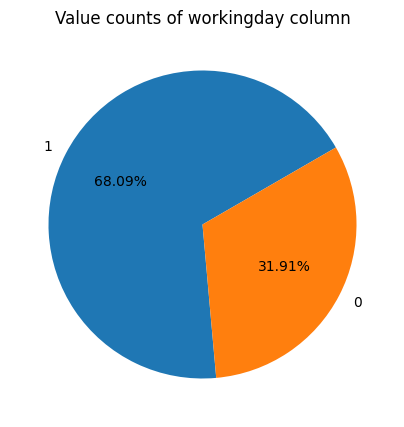

In [32]:
workingdays = df['workingday'].value_counts()
workingdays_df = df.groupby(['workingday'])['count'].sum()

plt.figure(figsize = (12,5))

plt.pie(workingdays, labels = workingdays.index, startangle = 30, autopct = "%.2f%%")
plt.title("Value counts of workingday column")

plt.show()

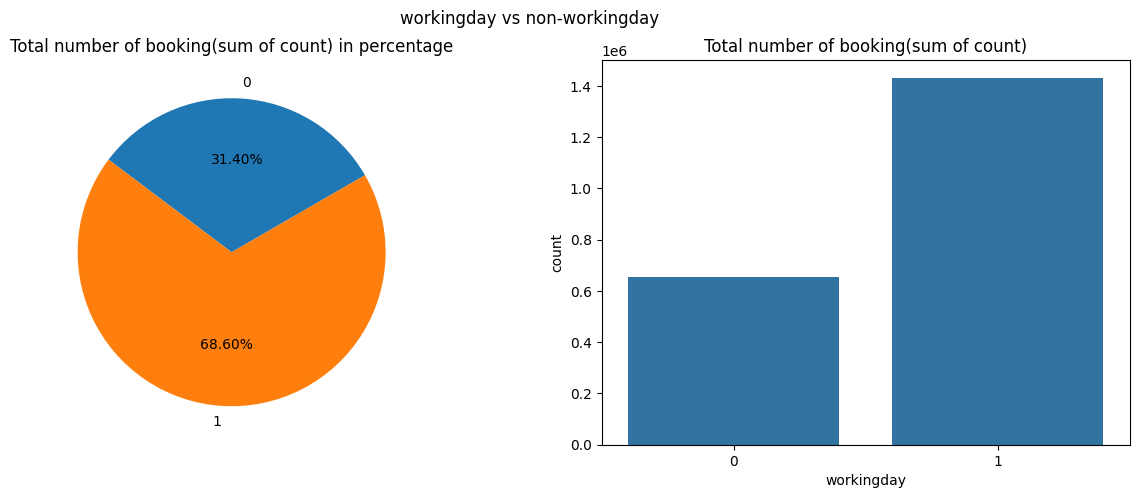

In [33]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(workingdays_df, labels = workingdays_df.index, startangle = 30, autopct = "%.2f%%")
plt.title("Total number of booking(sum of count) in percentage")

plt.subplot(1,2,2)
sns.barplot(data = workingdays_df)
plt.title("Total number of booking(sum of count)")

plt.suptitle("workingday vs non-workingday")
plt.show()

Insights:
1.   From the above observation, we can say that **most number** of bookings came from the **working days**
1.   This could be because that most of the Yulu customer are using the services when they want to **commute to work in working day**.
2.   The bookings happening in the weekend or non - working days could be coming from the tourists or local who want to do short day trip.
2.   We will have to investigate further to understand this more.



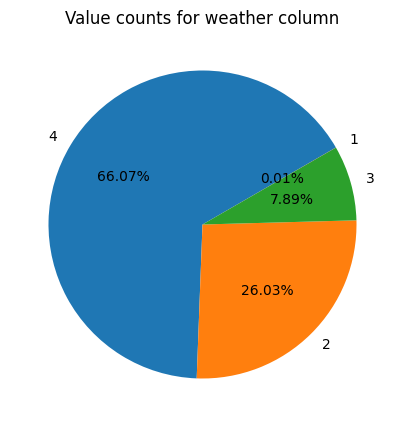

In [34]:
weathers = df['weather'].value_counts()
weathers_df = df.groupby(['weather'])['count'].sum()

plt.figure(figsize = (12,5))

plt.pie(weathers, labels = seasons.index, startangle = 30, autopct = "%.2f%%")
plt.title("Value counts for weather column")

plt.show()

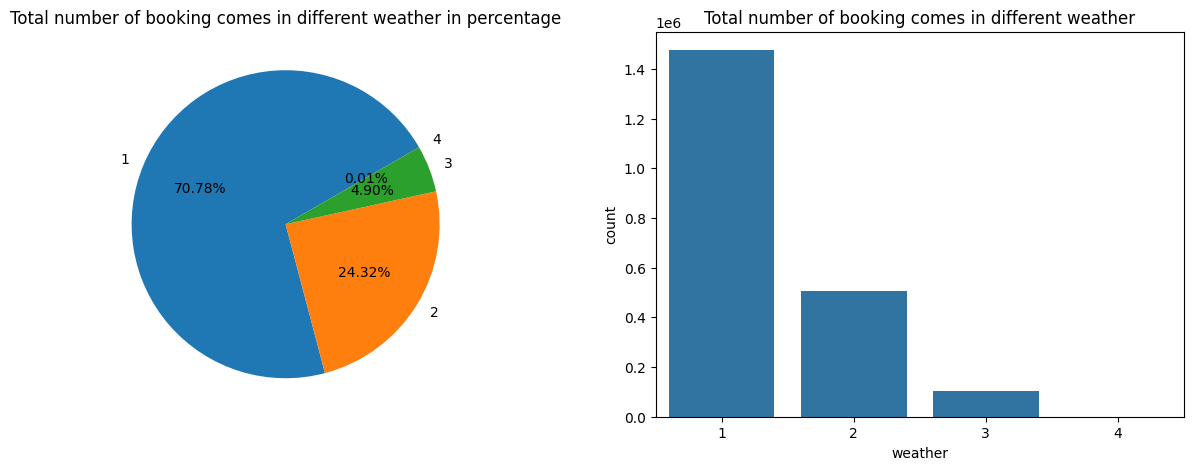

In [35]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(weathers_df, labels = weathers_df.index, startangle = 30, autopct = "%.2f%%")
plt.title("Total number of booking comes in different weather in percentage")

plt.subplot(1,2,2)
sns.barplot(data = weathers_df)
plt.title("Total number of booking comes in different weather")

plt.show()

Insights:
1.   **Weather 1(Clear, Few clouds, partly cloudy)**: This weather attracts **most** of the bookings. **70%** of the bookings comes when the weather is clear. This is because the weather will be **pleasant** and calm. People can use e-cycles for commuting to work or anywhere without any trouble.
2.    **Weather 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)**: Weather 2 attracts **second most** of the bookings. **25%** of the bookings comes when weather is misty and few clouds. People like to commute in e-cycles or bikes if the weather is pleasant.
1.   **Weather 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud)**: Weather 3 attracts **small fractions** of the bookings. **5%** of the bookings comes when weather is Light snow and rain.
2.    **Weather 4(Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog)**: Weather 4 attracts **very few** bookings. Only **5%** of the bookings comes during this weather.

We can conclude that people like to use e-cycles to commute to work in **Clear, pleasant and calm weather** and **not** when the weather is rugged like **Raining, Thunderstorm and Snow**. Yulu should promote the business during these weather to attract more bookings.




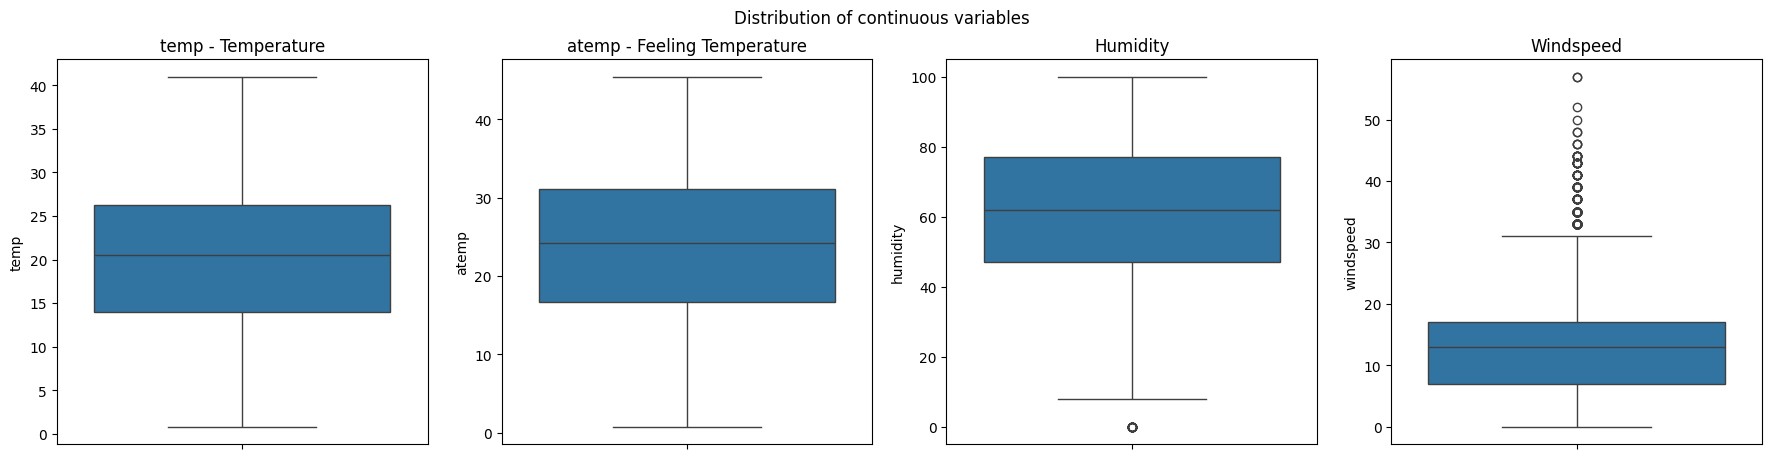

In [36]:
#plotting box plot for all the continuous variable
plt.figure(figsize = (22,5))

plt.subplot(1,4,1)
sns.boxplot(data = df, y = 'temp')
plt.title("temp - Temperature")

plt.subplot(1,4,2)
sns.boxplot(data = df, y = 'atemp')
plt.title("atemp - Feeling Temperature")

plt.subplot(1,4,3)
sns.boxplot(data = df, y = 'humidity')
plt.title("Humidity")

plt.subplot(1,4,4)
sns.boxplot(data = df, y = 'windspeed')
plt.title("Windspeed")

plt.suptitle("Distribution of continuous variables")
plt.show()

Insights:
1.   The **median temp and atemp** differs by **5 degree** Celsius. atemp(feeling temperature) observed to be higher than actual temperature
2.   Windspeed having few outliers in the data and median windspeed observed to be close to 12



In [37]:
month_df = df.groupby(['month'])
#month_df.casual.sum()

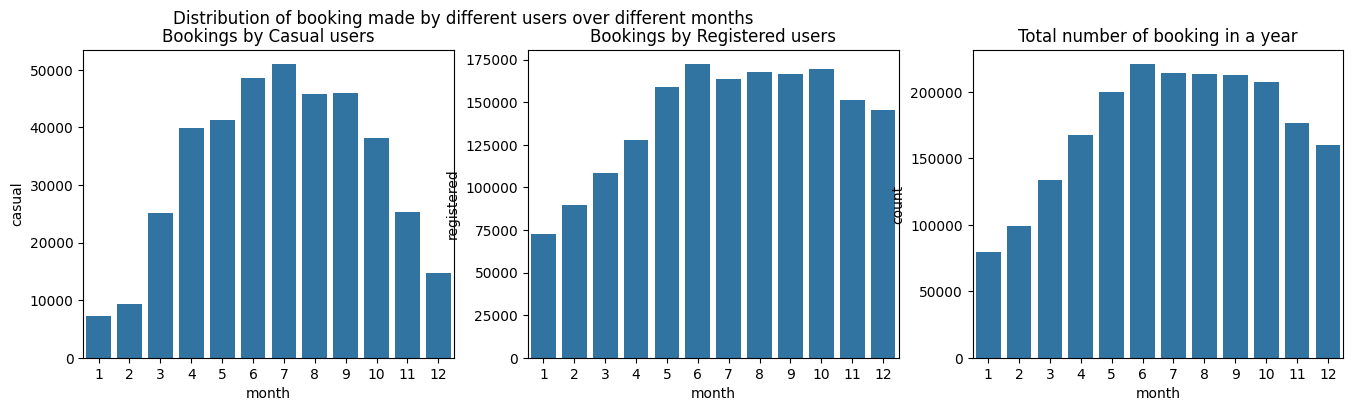

In [38]:
plt.figure(figsize = (22,4))

plt.subplot(1,4,2)
sns.barplot(data = month_df.casual.sum())
plt.title("Bookings by Casual users")

plt.subplot(1,4,3)
sns.barplot(data = month_df.registered.sum())
plt.title("Bookings by Registered users")

plt.subplot(1,4,4)
sns.barplot(data = month_df['count'].sum())
plt.title("Total number of booking in a year")

plt.suptitle("Distribution of booking made by different users over different months")
plt.show()

Insights:
1.   **Bookings by Casual Users**: Bookings were **minimal** on first **2** months and last month of an year. Bookings were increasing and reached **peak in June and July**. Mid months of the year attracted more bookings by casual users.
1.   **Bookings by Registered Users**: When compare to Casual users, bookings made by registered user are **way higher** in all the months. Bookings were **gradually increasing** in initial few months and got **stagnant** from 5th month with **150k to 175k** bookings till last month.

We can see the same pattern as registered user in total count of orders too.
Total number of bookings **gradually increasing** and got stagnant in the mid year and declining in the last months of the year. This is because of steep **decline** in no. of order from **casual users**.



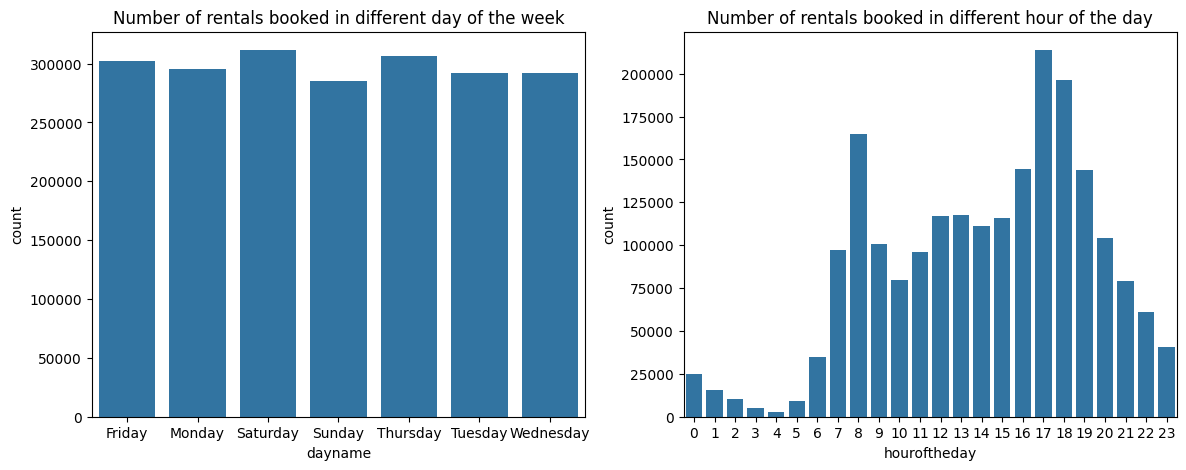

In [39]:
dayname_df = df.groupby(['dayname'])['count'].sum() #creating dataframe for dayname of the day
hour_df = df.groupby(['houroftheday'])['count'].sum() #creating dataframe for time of the day

plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.barplot(data = dayname_df)
plt.title("Number of rentals booked in different day of the week")

plt.subplot(1,2,2)
sns.barplot(data = hour_df)
plt.title("Number of rentals booked in different hour of the day")

plt.show()


Observations:
1.   Rental bookings are ***similar*** and close to **same** count in any given day of the week.
2.   While analysing which hour of the day acquire the most bookings, we could find that more orders placed in **8'O Clock** in the morning and from **5 to 8' O Clock** in the evening received more bookings.

This is the typically **office hours** and hence most bookings were made by **office goers**.



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  object        
 2   holiday       10886 non-null  object        
 3   workingday    10886 non-null  object        
 4   weather       10886 non-null  object        
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  date          10886 non-null  object        
 13  day           10886 non-null  int32         
 14  month         10886 non-null  int32         
 15  houroftheday  10886 non-null  int32 

In [41]:
df2 = df1.drop(columns = ['datetime'])
df2.corr() #creating correlation among the different columns

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


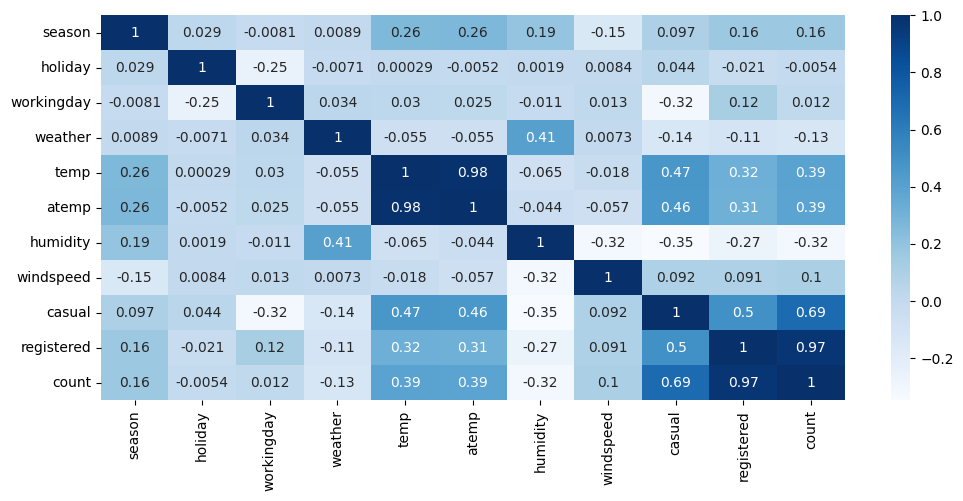

In [42]:
plt.figure(figsize = (12,5))
sns.heatmap(data = df2.corr(), annot= True, cmap = 'Blues')
plt.show()

Insights:
1.   **Casual** users and **registered** users are highly correlated to **count** column. It is pronounced since these users contribute to several bookings.
1.   **Humidity & Windspeed **is **negatively** correlated.
2.   **Humidity & Casual/Registered/Count** have **fair negative correlation**. We can say that people don't want to book e-cycles in the **high humid** conditions and vice versa. Humidity plays negative correlation with number of bookings.
2.   **Season** have least correlation with **Casual/Registered/Count**. Bookings comes fairly in all the seasons.
1.    **Working day & casual users** have **negative** correlation. With this point, we can say to some extent that casual users are using the e-cycles in the **weekend more than the weekdays**.
2.    **temp & atemp** had positive correlation with the number of bookings. we have to analysis further to investegate why.





#Is there any significant difference between the no. of bike rides on Weekdays and Weekends/Holiday?

##**Case 1:**

Step1: Hypothesis Formulation

**Null Hypothesis (H0)**: There is **no significant** difference in number of orders between weekdays and weekends. **μ1 = μ2**

**Alternate Hypothesis (H1):**  There is **significant** difference in number of orders between weekdays and weekends. **μ1 ≠ μ2**

In [43]:
#sample creation:

weekdays = df[df['workingday'] == 1]['count']
weekends = df[df['workingday'] == 0]['count']


Step 2: Selecting Two sample T-Test for this case and Calculating test statistics

In [44]:
#Checking the mean of bookings places in weekdays and weekends
weekdays.mean(), weekends.mean()

(193.01187263896384, 188.50662061024755)

In [45]:
#importing necessary library
from scipy.stats import ttest_ind

#Calculating test statistics
t_stat, p_value = ttest_ind(weekdays, weekends)
t_stat, p_value

(1.2096277376026694, 0.22644804226361348)

Step 3: Choosing Significant level:

  **Alpha** = 0.05

  **Confidence level** = 95%

In [46]:
alpha = 0.05 # 95% confidence

if p_value < alpha:
  print('Reject H0')
  print('Mean orders placed in weekdays and weekends are not same')
else:
  print ('Fail to Reject H0')
  print('Mean orders placed in weekdays and weekends are same and equal')

Fail to Reject H0
Mean orders placed in weekdays and weekends are same and equal


##**Case 2:**

Step1: Hypothesis Formulation

**Null Hypothesis (H0)**: There is **no significant** difference in number of orders between weekdays and weekends. **μ1 = μ2**

**Alternate Hypothesis (H1):**  The number of orders placed in weekdays are ***greater*** than weekends.. **μ1 > μ2**

Step 2: Selecting Two sample T-Test for this case and Calculating test statistics

In [47]:
#Calculating test statistics
t_stat, p_value = ttest_ind(weekdays, weekends, alternative = 'greater')
t_stat, p_value

(1.2096277376026694, 0.11322402113180674)

Step 3: Choosing Significant level:

  **Alpha** = 0.05

  **Confidence level** = 95%

In [48]:
alpha = 0.05 # 95% confidence

if p_value < alpha:
  print('Reject H0')
  print('Mean orders placed in weekdays is greater than weekends.')
else:
  print ('Fail to Reject H0')
  print('Mean orders placed in weekdays and weekends are same and equal')

Fail to Reject H0
Mean orders placed in weekdays and weekends are same and equal


##**Case 3:**

Step1: Hypothesis Formulation


**Null Hypothesis (H0)**: There is **no significant** difference in number of orders between weekdays and weekends. **μ1 = μ2**

**Alternate Hypothesis (H1):**  The number of orders placed in weekdays are **lesser** than weekends. **μ1 < μ2**

Step 2: Selecting Two sample T-Test for this case and calculating test statistics

In [49]:
#Calculating test statistics
t_stat, p_value = ttest_ind(weekdays, weekends, alternative = 'less')
t_stat, p_value

(1.2096277376026694, 0.8867759788681933)

Step 3: Choosing Significant level:

  **Alpha** = 0.05

  **Confidence level** = 95%

In [50]:
#Calculatingalpha = 0.05 # 95% confidence

if p_value < alpha:
  print('Reject H0')
  print('Mean orders placed in weekdays is lesser than weekends.')
else:
  print ('Fail to Reject H0')
  print('Mean orders placed in weekdays and weekends are same and equal')

Fail to Reject H0
Mean orders placed in weekdays and weekends are same and equal


#Inferences from above 2 Sample T-Test:
*   We have tested the samples to check if there is significant difference in the mean orders placed in weekdays and in weekends. We have tested in three cases.
*   In all three cases, we got **95% confidence** that there is **no difference** in the orders places in weekdays and weekends





# Is the demand of bicycles on rent is the same for different Weather conditions?

In [51]:
#Importing necessary libraries
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot


Hypothesis Formulation


**Null Hypothesis (H0)**: There is **no significant** difference in number of bookings in all the Weather conditions

**Alternate Hypothesis (H1):**  Atleast in **one weather conditions**, there is **significant** difference in bookings

Step 2: Selecting One Way ANOVA Test for this case and checking the prerequistics for the test

In [52]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

Step: 2A: Checking Normality of the Weather data - QQ plot

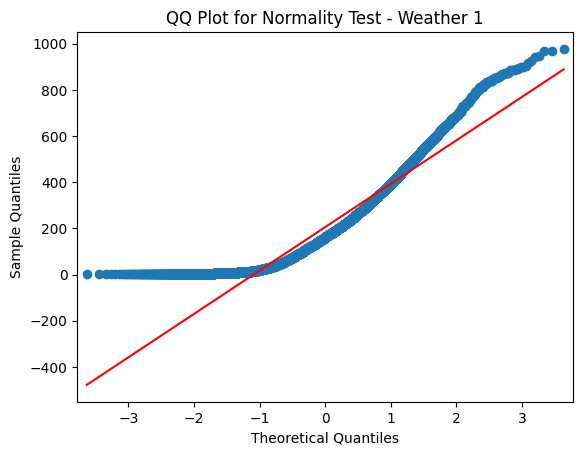

In [53]:
qqplot(weather1, line="s")
plt.title('QQ Plot for Normality Test - Weather 1')
plt.show()

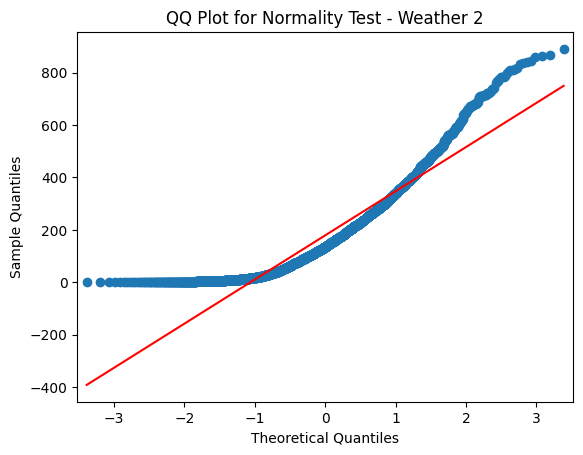

In [54]:
qqplot(weather2, line="s")
plt.title('QQ Plot for Normality Test - Weather 2')
plt.show()

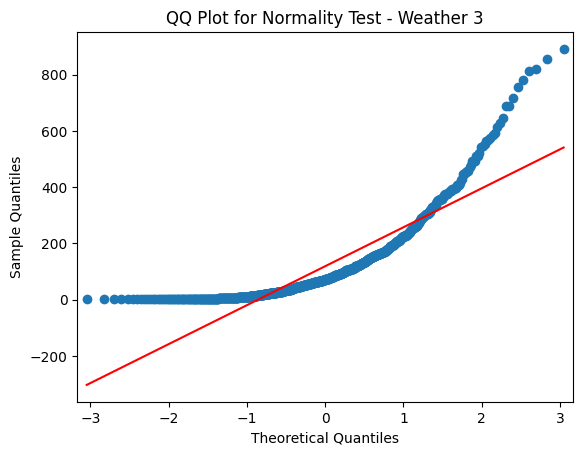

In [55]:
qqplot(weather3, line="s")
plt.title('QQ Plot for Normality Test - Weather 3')
plt.show()


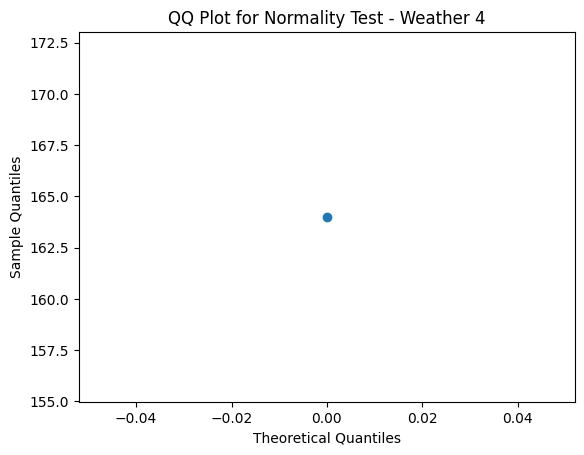

In [56]:
qqplot(weather4, line="s")
plt.title('QQ Plot for Normality Test - Weather 4')
plt.show()


Observation:
1.   From the above QQ plots, we can say that the **weather** data **does not** follow **normal distribution**.


Step: 2B: Checking whether variance is equal among the weather data - **Levene Test**

In [57]:
from scipy.stats import levene # Test variance

In [58]:
levene_stat, p_value = levene(weather1, weather2, weather3, weather4)
print(f'levene statistics: {levene_stat}')
print(f'p_value: {p_value}')

levene statistics: 54.85106195954556
p_value: 3.504937946833238e-35


In [59]:
alpha = 0.05
if p_value < alpha:
    print("Variances are not equal among all weather conditions")
else:
  print('Variances are equal')

Variances are not equal among all weather conditions


## **Observations:** From QQ Plot and Levene Test

From both the above test, we can say that the weather data is **not following Gaussian distribution** and have unequal variance among them. Still, we will proceed with the One way ANOVA test.


In [60]:
 #Checking the mean of bookings maded in different weather conditions
weather1.mean(), weather2.mean(), weather3.mean(), weather4.mean()

(205.23679087875416, 178.95553987297106, 118.84633294528521, 164.0)

Step 3: Calculating the test statistics and p_value

In [61]:
f_stats, p_value = f_oneway(weather1, weather2, weather3, weather4)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 65.53024112793271
p_value: 5.482069475935669e-42


Step 4: Defining confidence level and alpha:

  **Confidence level = 95 %**
  
  **Alpha = 0.05**

In [62]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast in one weather conditions have different mean bookings")
else:
    print("Fail to reject H0")
    print("All weather conditions have same mean bookings")

Reject H0
Atleast in one weather conditions have different mean bookings


Since the data is not following gaussian distribution and have unequal variance. As an option, Performing **Kruskal Wallis Test** as well.

In [63]:
from scipy.stats import kruskal

stats, p_value = kruskal(weather1, weather2, weather3, weather4)

print("test statistic:",stats)
print("p_value:",p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast in one weather conditions have different mean bookings")
else:
    print("Fail to reject H0")
    print("All weather conditions have same mean bookings")

test statistic: 205.00216514479087
p_value: 3.501611300708679e-44
Reject H0
Atleast in one weather conditions have different mean bookings


##Insights:
With the results from** One Way ANOVA Test** and **Krukal Wallis** Test, we can say that

**Atleast in one weather condition, number of bookings & mean rentals are different from other weather conditions.**

# Is the demand of bicycles on rent is the same for different Seasons?

Hypothesis Formulation


**Null Hypothesis (H0)**: There is **no significant** difference in number of bookings in all the **seasons**

**Alternate Hypothesis (H1):**  Atleast in **one season**, there is **significant** difference in bookings

Step 2: Selecting One Way ANOVA Test for this case and checking the prerequistics for the test

In [64]:
#Preparing dataframe for the each season
season1 = df[df['season'] == 1]['count']
season2 = df[df['season'] == 2]['count']
season3 = df[df['season'] == 3]['count']
season4 = df[df['season'] == 4]['count']

Step 2A: Checking the Normality of seasons data

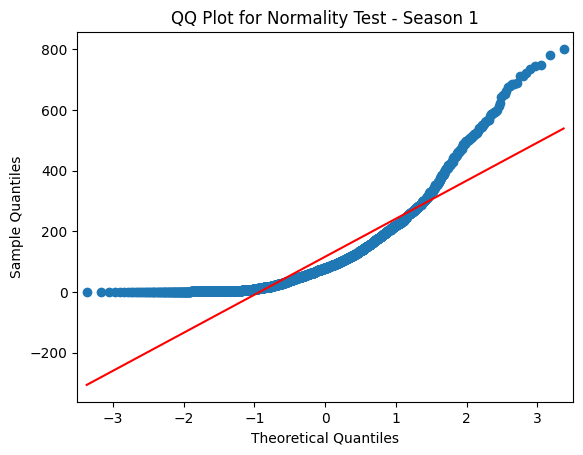

In [65]:
#Plotting QQ plot for Season 1
qqplot(season1, line="s")
plt.title('QQ Plot for Normality Test - Season 1')
plt.show()

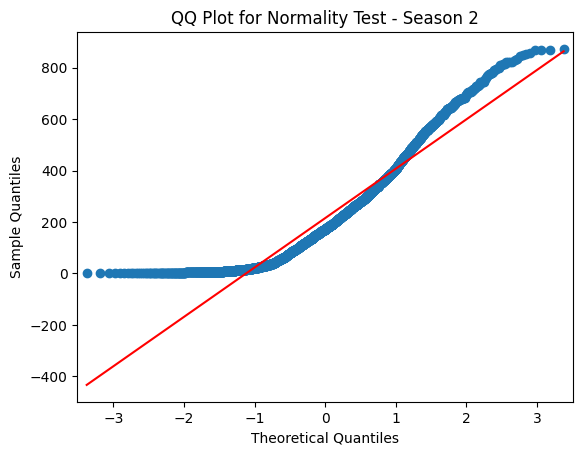

In [66]:
#Plotting QQ plot for Season 2
qqplot(season2, line="s")
plt.title('QQ Plot for Normality Test - Season 2')
plt.show()

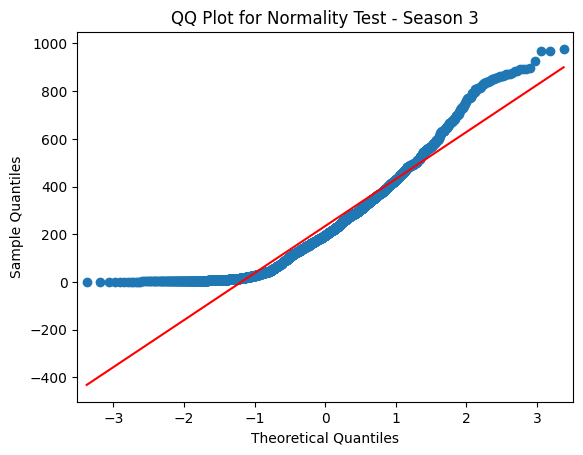

In [67]:
#Plotting QQ plot for Season 3
qqplot(season3, line="s")
plt.title('QQ Plot for Normality Test - Season 3')
plt.show()

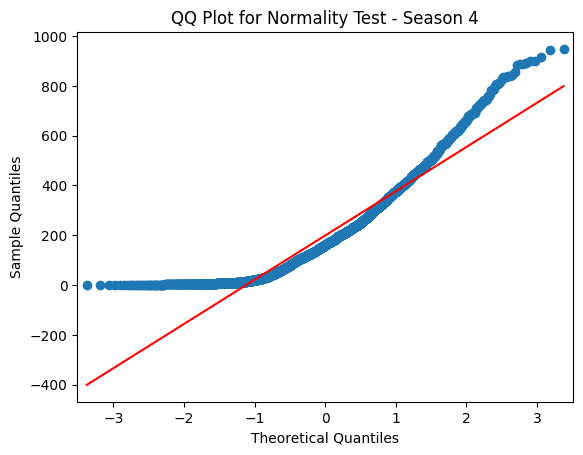

In [68]:
#Plotting QQ plot for Season 4
qqplot(season4, line="s")
plt.title('QQ Plot for Normality Test - Season 4')
plt.show()

To cross check, performing Shapiro Test only for Season 4.

In [69]:
from scipy.stats import shapiro

# H0: Data is Gaussian
# Ha: Data is not Gaussian

test_stat, p_value = shapiro(season4)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

1.1299244409282836e-39
Reject H0
Data is not Gaussian


Observation:
1.   From the above QQ plots, we can say that the **season** data **does not** follow **normal distribution**.


Step: 2B: Checking whether variance is equal among the season data - **Levene Test**

In [70]:
#Performing Levene test
levene_stat, p_value = levene(season1, season2, season3, season4)
print(f'levene statistics: {levene_stat}')
print(f'p_value: {p_value}')

levene statistics: 187.7706624026276
p_value: 1.0147116860043298e-118


## Observations:
From QQ Plot and Levene Test

From both the above test, we can say that the season data is also **not following Gaussian distribution** and have unequal variance among them. Still, we will proceed with the One way ANOVA test.


In [71]:
 #Checking the mean of bookings maded in different weather conditions
season1.mean(), season2.mean(), season3.mean(), season4.mean()

(116.34326135517499, 215.25137211855105, 234.417124039517, 198.98829553767374)

Step 3: Calculating the test statistics and p_value

In [72]:
f_stats, p_value = f_oneway(season1, season2, season3, season4)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 236.94671081032106
p_value: 6.164843386499654e-149


Step 4: Defining confidence level and alpha:

  **Confidence level = 95 %**
  
  **Alpha = 0.05**

In [73]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast in one of the seasons have different mean bookings")
else:
    print("Fail to reject H0")
    print("All weather conditions have same mean bookings")

Reject H0
Atleast in one of the seasons have different mean bookings


Since the data is not following gaussian distribution and have unequal variance. As an option, Performing **Kruskal Wallis Test** as well.

In [74]:
from scipy.stats import kruskal

#Performing Kruskal test
stats, p_value = kruskal(season1, season2, season3, season4)

print("test statistic:",stats)
print("p_value:",p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast in one weather conditions have different mean bookings")
else:
    print("Fail to reject H0")
    print("All weather conditions have same mean bookings")

test statistic: 699.6668548181988
p_value: 2.479008372608633e-151
Reject H0
Atleast in one weather conditions have different mean bookings


#Are the Weather conditions significantly different during different Seasons?

Hypothesis Formulation


**Null Hypothesis (H0)**: Season and Weather conditions are **independent**. No significant difference

**Alternate Hypothesis (H1):**  Season and Weather conditions are **dependent**. Significant difference

Step 2: Selecting Chisquare Test for this case

  2A: Creating Contigency Table

In [75]:
#Contigency table for seasons and weather
season_weather = pd.crosstab(df['season'], df['weather'])
season_weather #will give count of weathers in each season

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [76]:
from scipy.stats import chi2_contingency #importing necessary libraries

chi_stats, p_value, dof, expected = chi2_contingency(season_weather)
chi_stats, p_value

print("test statistic:",chi_stats)
print("p_value:",p_value)

test statistic: 49.158655596893624
p_value: 1.549925073686492e-07


Step 3: Setting up Significance level

Significance level = 0.05 (alpha)

In [77]:
#comparing the test statistics with p_value
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Season and Weather conditions are dependent")
else:
    print("Fail to reject H0")
    print("Season and Weather conditions are independent")

Reject H0
Season and Weather conditions are dependent


Observations:

From the **Chisquare** Test, we can that **Seasons and Weather conditions are dependent to each other** and thus bookings are also dependant among these two factors.

#Final Inferences:
*   Most of the bookings made on **working day or non - holiday**. Main purpose for the rental booking could be to commute to work during working days.
*   Among different seasons, bookings were made **most** in the **Summer and Fall** while we can see **less** bookings in the **spring**.
*   Among all weather conditions, people like to book rentals on a clear/partly clouds to light rain/light snow conditions. Does not prefer to take rentals in heavy rain and heavy snow.
*   Less Humid condition attracts more rental bookings
*  Rentals taken by Registered customers are **way high** than the casual customers.
*   Rentals booked between **8 AM To 8 PM** is significantly high. People who works in the night shift does not prefer the ecycle rentals.
*   Rental taken in **any day** of the week are the **same and equal**. We can say that people have need to commute in the weekend too or this could be done by the tourist population.






#Recommendations:
1.   **Station Selection:**
  *   Selecting the Yulu rental station plays crucial factor in attracting new and maintaining the existing customers. **Build more stations** close to Tech parks, SEZ areas, Malls and more crowded area.
  *   With the collected data, select the strategic location in such a way that bike station, maintanance workshop and charging station are in reachable distance.
1.   **User Profiling:**
  *   Monitor the customer behaviour by customer profiling. Find the pattern in casual and registered users.
  *   Encourage casual users to register in yulu application by promotional coupons and continue distributing the coupons
2.   **Niche Marketing**:
  *   Since we know that most of bookings comes from the daily office goers, promote the brands to the **working population** via placing **billboards** near Tech parks, canvasing inside the **Tech parks**, sending social media ads to people with chosen criteria.
  *   Promote **signup bonus** to the new customers and casual customer to register in yulu application
  *   Promote the yulu as environmental conscious brand with innovative content or ads which promotes environmental awareness.
2.   **Operation Patterns:**
  *   Optimize the operational patterns according to the season and the weather conditions. Reduce the bike availability during harsh weather/season and provide more bikes during pleasant climates.
  *   Send the bikes to maintainence during the off season or hours of the day. Continuously monitor and maintain the bikes and reduce the downtime
1.   **Data driven pricing model:**
*   Optimize the pricing for the bookings during different seasons, day of the week, time of the day and weather condition. For eg: Reduce the prices during the off season and increase the price during peak season, peak hours of the day.





